In [1]:
#import dependencies 
import psycopg2
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from getpass import getpass
password = getpass("Enter database password")

param_dic = {
    "host" : "localhost",
    "database" : "BRFSSAnalysis",
    "user" : "postgres",
    "password" : password
}

Enter database password········


In [3]:
def connect(params_dic):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [4]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    SELECT * from question_info
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [5]:
# Connect to the database
conn = connect(param_dic)
column_names = ["id", "var_name", "label", "text"]
# Execute the "SELECT *" query to save question_info as a datafram
question_info_df = postgresql_to_dataframe(conn, "select * from question_info", column_names)
question_info_df.head()

Connecting to the PostgreSQL database...
Connection successful


,id,var_name,label,text
0,1,_STATE,State FIPS Code,State FIPS Code
1,2,FMONTH,File Month,File Month
2,3,IDATE,Interview Date,Interview Date
3,4,IMONTH,Interview Month,Interview Month
4,5,IDAY,Interview Day,Interview Day


In [6]:
# Connect to the database and repeat process for question_values
conn = connect(param_dic)
column_names = ["id", "question_id", "label", "value", "value_end"]
# Execute the "SELECT *" query to save question_info as a datafram
answer_info_df = postgresql_to_dataframe(conn, "select * from question_values", column_names)
answer_info_df.head()

Connecting to the PostgreSQL database...
Connection successful


,id,question_id,label,value,value_end
0,1,1,Alabama,1,None
1,2,1,Alaska,2,None
2,3,1,Arizona,4,None
3,4,1,Arkansas,5,None
4,5,1,California,6,None


In [7]:
#determing which columns of user answers (aka relevant answers) to bring over
a = question_info_df['label'].values.tolist()
b = question_info_df['var_name'].values.tolist()

In [8]:
zip_iterator = zip(b, a)
a_dictionary = dict(zip_iterator)

In [9]:
for key, value in a_dictionary.items():
    print(key, ' : ', value)

_STATE  :  State FIPS Code
FMONTH  :  File Month
IDATE  :  Interview Date
IMONTH  :  Interview Month
IDAY  :  Interview Day
IYEAR  :  Interview Year
DISPCODE  :  Final Disposition
SEQNO  :  Annual Sequence Number
_PSU  :  Primary Sampling Unit
CTELENM1  :  Correct telephone number?
PVTRESD1  :  Private Residence?
COLGHOUS  :  Do you live in college housing?
STATERE1  :  Resident of State
CELPHONE  :  Cellular Telephone
LADULT1  :  Are you 18 years of age or older?
COLGSEX  :  Are you male or female?
NUMADULT  :  Number of Adults in Household
LANDSEX  :  Are you male or female?
NUMMEN  :  Number of Adult men in Household
NUMWOMEN  :  Number of Adult women in Household
RESPSLCT  :  Respondent selection
SAFETIME  :  Safe time to talk
CTELNUM1  :  Correct Phone Number?
CELLFON5  :  Is this a cell phone?
CADULT1  :  Are you 18 years of age or older?
CELLSEX  :  Are you male or female?
PVTRESD3  :  Do you live in a private residence?
CCLGHOUS  :  Do you live in college housing?
CSTATE1  :  D

In [10]:
#select columns to include from list above for health behaviour features predicting general, mental and physical health
columns = ["id", "_STATE", "GENHLTH", "PHYSHLTH", "MENTHLTH", "POORHLTH", "EXRACT11", "PAFREQ1_", "_MINAC11", "ACTIN12_", "EXRACT21", "PAFREQ2_", "_MINAC21", "ACTIN22_",  "STRFREQ_", "PA2MIN_", "_METSTAT", "_URBSTAT", "HTIN4", "WTKG3", "_RFBMI5", "_BMI5", "_RFSMOK3", "_RFDRHV7", "FC601_", "FTJUDA2_",  "GRENDA1_", "VEGEDA2_", "POTADA1_", "FRNCHDA_", "_FRUTSU1", "_VEGESU1", "_PAINDX2", "_PASTRNG", "_AGEG5YR", "_AGE80", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCSCNCR", "CHCOCNCR", "DIABETE4", "ADDEPEV3", "CHCKDNY2", "HAVARTH4", "HLTHCVR1", "HLTHPLN1", "_IMPRACE", "_EDUCAG", "INCOME2"]                 

In [11]:
# Connect to the database and repeat process for user_answers
conn = connect(param_dic)
column_names = columns
# Execute the "SELECT *" query to save question_info as a datafram
health_behaviour_df = postgresql_to_dataframe(conn, f"select id, _STATE, GENHLTH, PHYSHLTH, MENTHLTH, POORHLTH, EXRACT11, PAFREQ1_, _MINAC11, ACTIN12_, EXRACT21, PAFREQ2_, _MINAC21, ACTIN22_,  STRFREQ_, PA2MIN_, _METSTAT, _URBSTAT, HTIN4, WTKG3, _RFBMI5, _BMI5, _RFSMOK3, _RFDRHV7, FC601_, FTJUDA2_,  GRENDA1_, VEGEDA2_, POTADA1_, FRNCHDA_, _FRUTSU1, _VEGESU1,  _PAINDX2, _PASTRNG, _AGEG5YR, _AGE80, CVDINFR4, CVDCRHD4, CVDSTRK3, ASTHMA3, CHCSCNCR, CHCOCNCR, DIABETE4, ADDEPEV3, CHCKDNY2, HAVARTH4, HLTHCVR1, HLTHPLN1, _IMPRACE, _EDUCAG, INCOME2 from user_answers", column_names)


Connecting to the PostgreSQL database...
Connection successful


In [12]:
health_behaviour_df.head()

,id,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXRACT11,PAFREQ1_,_MINAC11,ACTIN12_,...,CHCOCNCR,DIABETE4,ADDEPEV3,CHCKDNY2,HAVARTH4,HLTHCVR1,HLTHPLN1,_IMPRACE,_EDUCAG,INCOME2
0,1,1.0,3.0,15.0,88.0,88.0,None,None,None,None,...,2.0,3.0,2.0,2.0,1.0,None,1.0,2.0,1.0,3.0
1,2,1.0,4.0,10.0,88.0,10.0,64.0,467.0,28.0,1.0,...,2.0,3.0,2.0,2.0,1.0,None,1.0,1.0,3.0,5.0
2,3,1.0,3.0,88.0,30.0,88.0,2.0,1000.0,60.0,2.0,...,2.0,1.0,2.0,2.0,1.0,None,1.0,2.0,4.0,7.0
3,4,1.0,4.0,30.0,88.0,88.0,None,None,None,None,...,2.0,3.0,2.0,2.0,1.0,None,1.0,1.0,3.0,6.0
4,5,1.0,2.0,88.0,88.0,None,None,None,None,None,...,2.0,3.0,2.0,2.0,2.0,None,1.0,1.0,3.0,99.0


In [13]:
#filling blank spaces with NaN
health_behaviour_df = health_behaviour_df.fillna(value=np.nan)

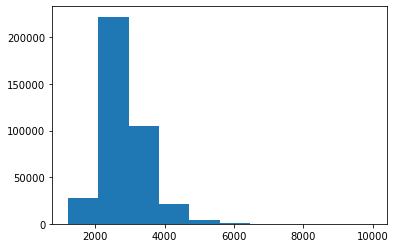

In [16]:
#test distribution of ratio variables
bmi = health_behaviour_df['_BMI5'].values.tolist()
#print('mean=%.3f stdv=%.3f' % (mean(bmi), std(bmi)))

from matplotlib import pyplot
pyplot.hist(bmi)
pyplot.show()

In [17]:
health_behaviour_df.to_csv('Data/uncleaned_health_behaviour.csv', index=False)

In [14]:
#Make a copy of health_behaviour_df to perform value recoding on
recoded_health_behaviour_df = health_behaviour_df.copy()

In [15]:
print(health_behaviour_df.isnull().sum())

id               0
_STATE           0
GENHLTH         26
PHYSHLTH        32
MENTHLTH        19
POORHLTH    188931
EXRACT11    130359
PAFREQ1_    140516
_MINAC11    146930
ACTIN12_    135951
EXRACT21    134658
PAFREQ2_    237530
_MINAC21    147892
ACTIN22_    143575
STRFREQ_     37082
PA2MIN_     140384
_METSTAT      8458
_URBSTAT      8458
HTIN4        20355
WTKG3        29748
_RFBMI5          0
_RFSMOK3         0
_RFDRHV7         0
FC601_           0
FTJUDA2_     38440
GRENDA1_     38902
VEGEDA2_     43369
POTADA1_     42224
FRNCHDA_     38866
_FRUTSU1     44600
_VEGESU1     53430
_PAINDX2         0
_PASTRNG         0
_AGEG5YR         0
CVDINFR4        10
CVDCRHD4         8
CVDSTRK3        11
ASTHMA3          8
CHCSCNCR         8
CHCOCNCR         9
DIABETE4         9
ADDEPEV3        10
CHCKDNY2        11
HAVARTH4        10
HLTHCVR1    321755
HLTHPLN1         9
_IMPRACE         0
_EDUCAG          0
INCOME2       6881
dtype: int64


## TODO: go through features and correct poorly coded values (e.g. 9999 = no answer)
clean up DF for null values
clean up poorly encoded variables

### GENHLTH 
#### question: Would you say that in general your health is:

Answers currently coded as : 
   - 1: Excellent
   - 2: Very Good
   - 3: Good
   - 4: Fair
   - 5: Poor
   - 7: Don't know/Not Sure
   - 9: Refused
   - BLANK: Not asked or Missing
   
Recode to: 
   - Nan: Don't know/Not Sure
   - Nan: Refused
   - BLANK: Not asked or Missing 
   - 1: Poor
   - 2: Fair
   - 3: Good
   - 4: Very Good
   - 5: Excellent
   

In [16]:
#print out original gen health values for reference and check data type
health_behaviour_df['GENHLTH'].head(20)

0     3.0
1     4.0
2     2.0
3     3.0
4     3.0
5     3.0
6     1.0
7     3.0
8     4.0
9     2.0
10    3.0
11    2.0
12    3.0
13    3.0
14    3.0
15    3.0
16    1.0
17    1.0
18    4.0
19    5.0
Name: GENHLTH, dtype: object

In [17]:
#recode GENHLTH values to new coding scheme described above
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 1., "GENHLTH"] = 5
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 2., "GENHLTH"] = 4
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 3., "GENHLTH"] = 3
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 4., "GENHLTH"] = 2
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 5., "GENHLTH"] = 1
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 7., "GENHLTH"] = np.NaN
recoded_health_behaviour_df.loc[health_behaviour_df.GENHLTH == 9., "GENHLTH"] = np.NaN

In [18]:
recoded_health_behaviour_df.GENHLTH = pd.to_numeric(recoded_health_behaviour_df.GENHLTH).astype('Int32')

In [19]:
#print to confirm values were recoded correctly
recoded_health_behaviour_df['GENHLTH'].head(20)

0     3
1     2
2     4
3     3
4     3
5     3
6     5
7     3
8     2
9     4
10    3
11    4
12    3
13    3
14    3
15    3
16    5
17    5
18    2
19    1
Name: GENHLTH, dtype: Int32

In [20]:
print(recoded_health_behaviour_df.isnull().sum())

id               0
_STATE           0
GENHLTH       1047
PHYSHLTH        32
MENTHLTH        19
POORHLTH    188931
EXRACT11    130359
PAFREQ1_    140516
_MINAC11    146930
ACTIN12_    135951
EXRACT21    134658
PAFREQ2_    237530
_MINAC21    147892
ACTIN22_    143575
STRFREQ_     37082
PA2MIN_     140384
_METSTAT      8458
_URBSTAT      8458
HTIN4        20355
WTKG3        29748
_RFBMI5          0
_RFSMOK3         0
_RFDRHV7         0
FC601_           0
FTJUDA2_     38440
GRENDA1_     38902
VEGEDA2_     43369
POTADA1_     42224
FRNCHDA_     38866
_FRUTSU1     44600
_VEGESU1     53430
_PAINDX2         0
_PASTRNG         0
_AGEG5YR         0
CVDINFR4        10
CVDCRHD4         8
CVDSTRK3        11
ASTHMA3          8
CHCSCNCR         8
CHCOCNCR         9
DIABETE4         9
ADDEPEV3        10
CHCKDNY2        11
HAVARTH4        10
HLTHCVR1    321755
HLTHPLN1         9
_IMPRACE         0
_EDUCAG          0
INCOME2       6881
dtype: int64


### State Codes
original code: 
- 1: Alabama
- 2	Alaska	
- 4	Arizona	
- 5	Arkansas	
- 6	California	
- 8	Colorado	
- 9	Connecticut	
- 10	Delaware	
- 11	District of Columbia	
- 12	Florida	
- 13	Georgia	
- 15	Hawaii	
- 16	Idaho	
- 17	Illinois	
- 18	Indiana	
- 19	Iowa	
- 20	Kansas	
- 21	Kentucky	
- 22	Louisiana	
- 23	Maine	
- 24	Maryland	
- 25	Massachusetts	
- 26	Michigan	
- 27	Minnesota	
- 28	Mississippi	
- 29	Missouri	
- 30	Montana	
- 31	Nebraska	
- 32	Nevada	
- 33	New Hampshire	
- 35	New Mexico	
- 36	New York	
- 37	North Carolina	
- 38	North Dakota	
- 39	Ohio	
- 40	Oklahoma	
- 41	Oregon	
- 42	Pennsylvania	
- 44	Rhode Island	
- 45	South Carolina	
- 46	South Dakota	
- 47	Tennessee	
- 48	Texas	
- 49	Utah	
- 50	Vermont	
- 51	Virginia	
- 53	Washington	
- 54	West Virginia	
- 55	Wisconsin	
- 56	Wyoming
- 66	Guam	
- 72	Puerto Rico
    

In [21]:
#recode states to two letter codes so they can work with go.choropleth

recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 1, "_STATE"] = 'AL'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 2, "_STATE"] = 'AK'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 4, "_STATE"] = 'AZ'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 5, "_STATE"] = 'AR'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 6, "_STATE"] = 'CA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 8, "_STATE"] = 'CO'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 9, "_STATE"] = 'CT'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 10, "_STATE"] = 'DE'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 11, "_STATE"] = 'DC'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 12, "_STATE"] = 'FL'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 13, "_STATE"] = 'GA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 15, "_STATE"] = 'HI'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 16, "_STATE"] = 'ID'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 17, "_STATE"] = 'IL'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 18, "_STATE"] = 'IN'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 19, "_STATE"] = 'IA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 20, "_STATE"] = 'KS'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 21, "_STATE"] = 'KY'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 22, "_STATE"] = 'LA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 23, "_STATE"] = 'ME'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 24, "_STATE"] = 'MD'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 25, "_STATE"] = 'MA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 26, "_STATE"] = 'MI'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 27, "_STATE"] = 'MN'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 28, "_STATE"] = 'MS'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 29, "_STATE"] = 'MO'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 30, "_STATE"] = 'MT'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 31, "_STATE"] = 'NE'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 32, "_STATE"] = 'NV'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 33, "_STATE"] = 'NH'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 35, "_STATE"] = 'NM'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 36, "_STATE"] = 'NY'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 37, "_STATE"] = 'NC'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 38, "_STATE"] = 'ND'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 39, "_STATE"] = 'OH'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 40, "_STATE"] = 'OK'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 41, "_STATE"] = 'OR'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 42, "_STATE"] = 'PA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 44, "_STATE"] = 'RI'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 45, "_STATE"] = 'SC'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 46, "_STATE"] = 'SD'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 47, "_STATE"] = 'TN'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 48, "_STATE"] = 'TX'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 49, "_STATE"] = 'UT'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 50, "_STATE"] = 'VT'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 51, "_STATE"] = 'VA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 53, "_STATE"] = 'WA'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 54, "_STATE"] = 'WV'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 55, "_STATE"] = 'WI'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 56, "_STATE"] = 'WY'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 66, "_STATE"] = 'GU'
recoded_health_behaviour_df.loc[recoded_health_behaviour_df._STATE == 72, "_STATE"] = 'PR'

### _PAINDX2
#### Question:  Physical Activity Index
Values originally coded as:
- 1: Meet Aerobic Recommendations
- 2: Did Not Meet Aerobic Recommendations
- 9: Don’t know/Not Sure/Refused/Missing

Recode to:
- 1: Meet Aerobic Recommendations
- 2: Did Not Meet Aerobic Recommendations
- Nan: Don’t know/Not Sure/Refused/Missing
    

In [22]:
recoded_health_behaviour_df['_PAINDX2'].head(20)

0     1.0
1     2.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     9.0
8     1.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    1.0
15    2.0
16    1.0
17    9.0
18    2.0
19    2.0
Name: _PAINDX2, dtype: object

In [23]:
# recode values to new coding scheme described above
recoded_health_behaviour_df.loc[health_behaviour_df._PAINDX2 == 9, "_PAINDX2"] = np.NaN
recoded_health_behaviour_df._PAINDX2 = pd.to_numeric(recoded_health_behaviour_df._PAINDX2).astype('Int32')

In [24]:
recoded_health_behaviour_df['_PAINDX2'].unique()

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int32

### _PASTRNG
#### Question:  Muscle Strengthening Recommendation
Originally coded as:
- 1: Meet muscle strengthening recommendations
- 2: Did not meet muscle strengthening recommendations
- 9: Don’t know/Not Sure/Refused/Missing

Recode to:
- 1: Meet muscle strengthening recommendations
- 2: Did not meet muscle strengthening recommendations
- Nan: Don’t know/Not Sure/Refused/Missing

In [25]:
recoded_health_behaviour_df['_PASTRNG'].unique()

array([Decimal('2.0'), Decimal('1.0'), Decimal('9.0')], dtype=object)

In [26]:
# recode values to new coding scheme described above
recoded_health_behaviour_df.loc[health_behaviour_df._PASTRNG == 9, "_PASTRNG"] = np.NaN
recoded_health_behaviour_df._PASTRNG = pd.to_numeric(recoded_health_behaviour_df._PASTRNG).astype('Int32')

In [27]:
recoded_health_behaviour_df['_PASTRNG'].unique()

<IntegerArray>
[2, 1, <NA>]
Length: 3, dtype: Int32

### _FRUTSU1
#### Question:  Total fruits consumed per day
Originally coded as: 
- 0-99998: Number of Fruits consumed per day (two implied decimal places)
- BLANK: Not asked or Missing

Recode to:
- 0.00-999.98: Number of Fruits consumed per day
- Nan: Not asked or Missing

In [28]:
recoded_health_behaviour_df['_FRUTSU1'].head(20)

0       NaN
1     114.0
2      10.0
3      46.0
4     100.0
5     329.0
6     114.0
7       NaN
8     100.0
9     203.0
10     86.0
11      NaN
12     43.0
13      NaN
14    200.0
15     57.0
16    214.0
17      NaN
18     45.0
19     13.0
Name: _FRUTSU1, dtype: object

In [29]:
#TODO: convert to int to remove decimal place, convert to string then interate through and insert decimal before last two digits, convert to float

In [30]:
recoded_health_behaviour_df['_FRUTSU1'] = recoded_health_behaviour_df['_FRUTSU1'].fillna(100000).astype(float)

In [31]:
recoded_health_behaviour_df['_FRUTSU1'].head(20)

0     100000.0
1        114.0
2         10.0
3         46.0
4        100.0
5        329.0
6        114.0
7     100000.0
8        100.0
9        203.0
10        86.0
11    100000.0
12        43.0
13    100000.0
14       200.0
15        57.0
16       214.0
17    100000.0
18        45.0
19        13.0
Name: _FRUTSU1, dtype: float64

In [32]:
recoded_health_behaviour_df['_FRUTSU1'] = recoded_health_behaviour_df['_FRUTSU1'].div(100).round(2)

In [33]:
recoded_health_behaviour_df['_FRUTSU1'].head(20)

0     1000.00
1        1.14
2        0.10
3        0.46
4        1.00
5        3.29
6        1.14
7     1000.00
8        1.00
9        2.03
10       0.86
11    1000.00
12       0.43
13    1000.00
14       2.00
15       0.57
16       2.14
17    1000.00
18       0.45
19       0.13
Name: _FRUTSU1, dtype: float64

In [34]:
recoded_health_behaviour_df['_FRUTSU1'] = recoded_health_behaviour_df['_FRUTSU1'].mask(np.isclose(recoded_health_behaviour_df['_FRUTSU1'].values, 1000.00))

In [35]:
recoded_health_behaviour_df['_FRUTSU1'].head(20)

0      NaN
1     1.14
2     0.10
3     0.46
4     1.00
5     3.29
6     1.14
7      NaN
8     1.00
9     2.03
10    0.86
11     NaN
12    0.43
13     NaN
14    2.00
15    0.57
16    2.14
17     NaN
18    0.45
19    0.13
Name: _FRUTSU1, dtype: float64

###  _VEGESU1
#### Question:  Total vegetables consumed per day
Originally coded as: 
- 0-99998: Number of Vegetables consumed per day (two implied decimal places)
- BLANK: Not asked or Missing

Recode to:
- 0.00-999.98: Number of Vegetables consumed per day
- Nan: Not asked or Missing

In [36]:
recoded_health_behaviour_df['_VEGESU1'].head(20)

0       NaN
1      89.0
2     179.0
3     113.0
4      89.0
5      82.0
6     235.0
7       NaN
8      75.0
9     135.0
10    100.0
11     61.0
12    129.0
13      NaN
14    200.0
15      NaN
16    310.0
17      NaN
18     46.0
19    414.0
Name: _VEGESU1, dtype: object

In [37]:
recoded_health_behaviour_df['_VEGESU1'] = recoded_health_behaviour_df['_VEGESU1'].fillna(100000).astype(float)
recoded_health_behaviour_df['_VEGESU1'] = recoded_health_behaviour_df['_VEGESU1'].div(100).round(2)
recoded_health_behaviour_df['_VEGESU1'] = recoded_health_behaviour_df['_VEGESU1'].mask(np.isclose(recoded_health_behaviour_df['_VEGESU1'].values, 1000.00))
recoded_health_behaviour_df['_VEGESU1'].head(20)

0      NaN
1     0.89
2     1.79
3     1.13
4     0.89
5     0.82
6     2.35
7      NaN
8     0.75
9     1.35
10    1.00
11    0.61
12    1.29
13     NaN
14    2.00
15     NaN
16    3.10
17     NaN
18    0.46
19    4.14
Name: _VEGESU1, dtype: float64

In [38]:
state_veg_mean = recoded_health_behaviour_df.groupby('_STATE')['_VEGESU1'].mean().reset_index()

## FRNCHDA_
Question:  French Fry intake in times per day
Originally coded as: 
- 0-99998: Times per day (two implied decimal places)
- BLANK: Not asked or Missing

Recode to:
- 0.00-999.98: Times per week
- Nan: Not asked or Missing

In [39]:
recoded_health_behaviour_df['FRNCHDA_'].head(20)

0      NaN
1     14.0
2     33.0
3     29.0
4     29.0
5      3.0
6      7.0
7      NaN
8      3.0
9     43.0
10    43.0
11     3.0
12     0.0
13     NaN
14     0.0
15     0.0
16     0.0
17     NaN
18    13.0
19    57.0
Name: FRNCHDA_, dtype: object

In [40]:
recoded_health_behaviour_df['FRNCHDA_'] = recoded_health_behaviour_df['FRNCHDA_']*7
recoded_health_behaviour_df['FRNCHDA_'] = recoded_health_behaviour_df['FRNCHDA_'].fillna(100000).astype(float)
recoded_health_behaviour_df['FRNCHDA_'] = recoded_health_behaviour_df['FRNCHDA_'].div(100).round(2)



In [41]:
recoded_health_behaviour_df['FRNCHDA_'] = recoded_health_behaviour_df['FRNCHDA_'].mask(np.isclose(recoded_health_behaviour_df['FRNCHDA_'].values, 1000.00))
recoded_health_behaviour_df['FRNCHDA_'].head(20)

0      NaN
1     0.98
2     2.31
3     2.03
4     2.03
5     0.21
6     0.49
7      NaN
8     0.21
9     3.01
10    3.01
11    0.21
12    0.00
13     NaN
14    0.00
15    0.00
16    0.00
17     NaN
18    0.91
19    3.99
Name: FRNCHDA_, dtype: float64

In [42]:
state_fry_mean = recoded_health_behaviour_df.groupby('_STATE')['FRNCHDA_'].mean().reset_index()

## TODO: get mean values per state for chloropleth maps

### Health Behaviours Chloropleth maps by state

In [43]:
### Fruits per day by state

In [44]:
state_fruit_mean = recoded_health_behaviour_df.groupby('_STATE')['_FRUTSU1'].mean().reset_index()

In [45]:
state_fruit_mean.head(20)


,_STATE,_FRUTSU1
0,AK,1.540369
1,AL,1.232993
2,AR,1.569661
3,AZ,1.748288
4,CA,1.435239
5,CO,1.396317
6,CT,1.946547
7,DC,1.532979
8,DE,1.426221
9,FL,1.394397


In [46]:
## 

In [47]:
### % of state that meets physical activity reccomendations
#TODO: group by state, find % of '1': meets reccomendations
state_act_mean_df = recoded_health_behaviour_df[['_STATE', '_PAINDX2']].dropna()
state_act_mean_df.head(20)

,_STATE,_PAINDX2
0,CA,1
1,CA,2
2,CA,1
3,CA,1
4,CA,1
5,CA,1
6,CA,2
8,CA,1
9,CA,2
10,CA,2


In [48]:
#group by _PAINDX2 and calculate sum of '1' within each state

def calc_perc(x): 
    return 100 * x / float(x.sum())

state_act_mean = state_act_mean_df.groupby(['_STATE', '_PAINDX2' ], as_index=False).agg({'_PAINDX2': 'sum'})
act_perc_df = state_act_mean.groupby('_STATE').apply(calc_perc)
#add back in _STATE column fore reference
act_perc_df['_STATE'] = state_act_mean['_STATE']
state_act_mean.head()

,_STATE,_PAINDX2
0,AK,1642
1,AK,2078
2,AL,2885
3,AL,6862
4,AR,2277


In [49]:
act_perc_df.head(20)

,_PAINDX2,_STATE
0,44.139785,AK
1,55.860215,AK
2,29.598851,AL
3,70.401149,AL
4,31.196054,AR
5,68.803946,AR
6,40.685358,AZ
7,59.314642,AZ
8,38.18882,CA
9,61.81118,CA


In [50]:
#Groupy organized states by _PAINDX2 1 sum then 2 sum so remove even numbers dataframe rows to keep only value representing percentage of state that did meet reccomended physical activity
pass_state_phys_act = act_perc_df[np.arange(len(act_perc_df)) % 2 == 0]
pass_state_phys_act.head(20)


,_PAINDX2,_STATE
0,44.139785,AK
2,29.598851,AL
4,31.196054,AR
6,40.685358,AZ
8,38.18882,CA
10,43.527172,CO
12,40.344201,CT
14,40.514776,DC
16,34.872798,DE
18,36.988839,FL


In [51]:
### % of state that meets strength activity reccomendations
#TODO: group by state, find % of '1': meets reccomendations
state_strength_mean_df = recoded_health_behaviour_df[['_STATE', '_PASTRNG']].dropna()
state_strength_mean_df.head(20)

,_STATE,_PASTRNG
0,CA,2
1,CA,2
2,CA,2
3,CA,2
4,CA,1
5,CA,2
6,CA,1
8,CA,2
9,CA,1
10,CA,2


In [52]:
#group by _PAINDX2 and calculate sum of '1' within each state

def calc_perc(x): 
    return 100 * x / float(x.sum())

state_strength_mean = state_strength_mean_df.groupby(['_STATE', '_PASTRNG' ], as_index=False).agg({'_PASTRNG': 'sum'})
strength_perc_df = state_strength_mean.groupby('_STATE').apply(calc_perc)
#add back in _STATE column fore reference
strength_perc_df['_STATE'] = state_strength_mean['_STATE']
state_strength_mean.head()

,_STATE,_PASTRNG
0,AK,1020
1,AK,3366
2,AL,1759
3,AL,9360
4,AR,1528


In [53]:
strength_perc_df.head(20)

,_PASTRNG,_STATE
0,23.255814,AK
1,76.744186,AK
2,15.819768,AL
3,84.180232,AL
4,18.920258,AR
5,81.079742,AR
6,23.537583,AZ
7,76.462417,AZ
8,19.958599,CA
9,80.041401,CA


In [54]:
#Groupy organized states by _PAINDX2 1 sum then 2 sum so remove even numbers dataframe rows to keep only value representing percentage of state that did meet reccomended physical activity
pass_state_strength = strength_perc_df[np.arange(len(strength_perc_df)) % 2 == 0]
pass_state_strength.head(20)


,_PASTRNG,_STATE
0,23.255814,AK
2,15.819768,AL
4,18.920258,AR
6,23.537583,AZ
8,19.958599,CA
10,24.385717,CO
12,24.486094,CT
14,25.591635,DC
16,22.521246,DE
18,22.662702,FL


## TODO: 
_RFDRHV7:
Question:  Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Coded as:
- 1: No
- 2: Yes
- 9: Don't know

Recode to:
- 1: No
- 2: Yes
- Nan: Don't know


In [55]:
#recode to new scheme
recoded_health_behaviour_df.loc[health_behaviour_df._RFDRHV7 == 9, "_RFDRHV7"] = np.NaN
recoded_health_behaviour_df['_RFDRHV7'].unique()

array([Decimal('1.0'), Decimal('2.0'), nan], dtype=object)

In [56]:
### % of state that is heavy drinkers
#TODO: group by state, find % of '2': heavy drinker
state_drink_heavy_df = recoded_health_behaviour_df[['_STATE', '_RFDRHV7']].dropna()
state_drink_heavy_df._RFDRHV7 = pd.to_numeric(state_drink_heavy_df._RFDRHV7).astype('Int32')
state_drink_heavy_df.head(20)

,_STATE,_RFDRHV7
0,CA,1
1,CA,1
2,CA,1
3,CA,2
4,CA,1
5,CA,1
6,CA,1
8,CA,1
9,CA,1
10,CA,1


In [57]:
#group by _RFDRHV7 and calculate sum of '2' within each state

def calc_perc(x): 
    return 100 * x / float(x.sum())

state_drink = state_drink_heavy_df.groupby(['_STATE', '_RFDRHV7' ], as_index=False).agg({'_RFDRHV7': 'sum'})
drink_perc_df = state_drink.groupby('_STATE').apply(calc_perc)
#add back in _STATE column fore reference
drink_perc_df['_STATE'] = state_drink['_STATE']
drink_perc_df.head()

,_RFDRHV7,_STATE
0,83.685601,AK
1,16.314399,AK
2,90.583804,AL
3,9.416196,AL
4,91.579348,AR


In [58]:
#Groupy organized states by _RFDRHV7 1 sum then 2 sum so remove odd numbers dataframe rows to keep only value representing percentage of state that did meet reccomended physical activity
drink_perc_df = drink_perc_df[np.arange(len(drink_perc_df)) % 2 != 0]
drink_perc_df['_RFDRHV7'].head(20)

1     16.314399
3      9.416196
5      8.420652
7     11.080711
9     11.477863
11    11.503643
13    11.354294
15    13.768404
17    11.552535
19    13.031058
21    10.236109
23    12.940213
25    15.982884
27    11.350254
29    11.539875
31    12.788632
33     9.467593
35    10.241667
37     8.886108
39    13.744076
Name: _RFDRHV7, dtype: Float64

## _RFSMOK3
Question:  Adults who are current smokers
    
Coded as:
- 1: No
- 2: Yes
- 9: Don't know

Recode to:
- 1: No
- 2: Yes
- Nan: Don't know
        

In [59]:
#recode to new scheme
recoded_health_behaviour_df.loc[health_behaviour_df._RFSMOK3 == 9, "_RFSMOK3"] = np.NaN
recoded_health_behaviour_df['_RFSMOK3'].unique()

array([Decimal('1.0'), nan, Decimal('2.0')], dtype=object)

In [60]:
### % of state that is heavy drinkers
#TODO: group by state, find % of '2': heavy drinker
state_smoke_df = recoded_health_behaviour_df[['_STATE', '_RFSMOK3']].dropna()
state_smoke_df._RFSMOK3 = pd.to_numeric(state_smoke_df._RFSMOK3).astype('Int32')
state_smoke_df.head(20)

,_STATE,_RFSMOK3
0,CA,1
1,CA,1
2,CA,1
3,CA,1
4,CA,1
5,CA,1
6,CA,1
8,CA,1
9,CA,1
10,CA,1


In [61]:
#group by _RFDRHV7 and calculate sum of '2' within each state
state_smoke = state_smoke_df.groupby(['_STATE', '_RFSMOK3' ], as_index=False).agg({'_RFSMOK3': 'sum'})
smoke_perc_df = state_smoke.groupby('_STATE').apply(calc_perc)
#add back in _STATE column fore reference
smoke_perc_df['_STATE'] = state_smoke['_STATE']
smoke_perc_df.head()

,_RFSMOK3,_STATE
0,71.989134,AK
1,28.010866,AK
2,70.690964,AL
3,29.309036,AL
4,72.226898,AR


In [62]:
#Groupy organized states by _RFDRHV7 1 sum then 2 sum so remove odd numbers dataframe rows to keep only value representing percentage of state that did meet reccomended physical activity
smoke_perc_df = smoke_perc_df[np.arange(len(smoke_perc_df)) % 2 != 0]
smoke_perc_df['_RFSMOK3'].head(20)

1     28.010866
3     29.309036
5     27.773102
7     23.307251
9     18.423472
11    21.139554
13    18.666946
15    21.138211
17    24.946846
19    28.586904
21    28.029637
23    31.666667
25    21.847525
27    25.653775
29    24.079602
31    22.775564
33    27.897478
35    24.547741
37    33.870275
39    32.228916
Name: _RFSMOK3, dtype: Float64

In [63]:
##Make health behaviours df with columns for each
#Including, daily veg, daily fruit, daily fries, smoking, smoking, alcohol, phys activity, strength
hb_df = state_veg_mean.copy() #Daily Veg
hb_df['_FRUTSU1'] = state_fruit_mean['_FRUTSU1'].values # Daily Fruits
hb_df['FRNCHDA_'] = state_fry_mean['FRNCHDA_'].values#daily fries
hb_df['_RFDRHV7'] = drink_perc_df['_RFDRHV7'].values #Alcohol
hb_df['_RFSMOK3'] = smoke_perc_df['_RFSMOK3'].values #smoking
hb_df['_PAINDX2'] = pass_state_phys_act['_PAINDX2'].values #Aerobic
hb_df['_PASTRNG'] = pass_state_strength['_PASTRNG'].values#Strength

hb_df.head(20)

,_STATE,_VEGESU1,_FRUTSU1,FRNCHDA_,_RFDRHV7,_RFSMOK3,_PAINDX2,_PASTRNG
0,AK,2.332528,1.540369,1.702429,16.314399,28.010866,44.139785,23.255814
1,AL,1.744130,1.232993,1.630749,9.416196,29.309036,29.598851,15.819768
2,AR,2.422322,1.569661,2.198288,8.420652,27.773102,31.196054,18.920258
3,AZ,2.650538,1.748288,1.924467,11.080711,23.307251,40.685358,23.537583
4,CA,1.825288,1.435239,1.202959,11.477863,18.423472,38.18882,19.958599
5,CO,1.876607,1.396317,1.322021,11.503643,21.139554,43.527172,24.385717
6,CT,2.916833,1.946547,1.484880,11.354294,18.666946,40.344201,24.486094
7,DC,2.085319,1.532979,1.289638,13.768404,21.138211,40.514776,25.591635
8,DE,1.864820,1.426221,1.397133,11.552535,24.946846,34.872798,22.521246
9,FL,1.984152,1.394397,1.480661,13.031058,28.586904,36.988839,22.662702


In [152]:
behaviour_fig = go.Figure(data=go.Choropleth(
    locations=hb_df['_STATE'],
    z=hb_df['_VEGESU1'].astype(float),
    locationmode='USA-states',
    colorscale='Teal',
    autocolorscale=False,
    text=hb_df['_STATE'], # hover text
    marker_line_color='white', # line markers between states
    #colorbar_title="Vegetables Eaten per Day"
))

behaviour_fig.update_layout(
    #font_family="Bookman Antiqua",
    font_color="Black",
    title ={'text':'Average Number of Vegetables Eaten a Day',
           'font_size':20,
           'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

behaviour_fig.show()

In [153]:
##HEALTH BEHAVIOUR DROP DOWN CHOROPLETH
#Including, daily veg, daily fruit, daily fries, alcohol, smoking, phys activity, strength
button1 = dict(method= 'update',
               label='Daily Veg',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_VEGESU1']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["Vegetables per Day"]
                                    }, {'title.text' : 'Average Number of Vegetables Eaten per Day'}
                                 ])

button2 = dict(method= 'update',
               label='Daily Fruit',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_FRUTSU1']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["Fruits per Day"]
                                    },  {'title.text' : 'Average Number of Fruits Eaten per Day'}
                                 ])
button3 = dict(method= 'update',
               label='Weekly Fries',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['FRNCHDA_']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["Servings of Fries per Week"]
                                    },  {'title.text' : 'Average Number of Times French Fries are Eaten per Week'}
                                 ])

button4 = dict(method= 'update',
               label='Alcohol',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_RFDRHV7']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% of Heavy Drinkers"]
                                    },  {'title.text' : 'Percentage of State Population Considered Heavy Drinkers<br>adult men having more than 14 drinks per week and adult women having more than 7 drinks per week<br>(Hover for breakdown)'}
                                 ])

button5 = dict(method= 'update',
               label='Smoking',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_RFSMOK3']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% of Current Smokers"]
                                   },  {'title.text' : 'Percentage of State Population Currently Smoking Cigarettes<br> Includes Daily and Occasional Smokers <br>(Hover for breakdown)'}
                                 ])

button6 = dict(method= 'update',
               label='Aerobic Exc',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_PAINDX2']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% Meeting Recommendations"]
                                    },  {'title.text' : 'Percentage of State Population Meeting Weeekly Aerobic Exercise Recommendations<br>(Hover for breakdown)'}
                                 ])

button7 = dict(method= 'update',
               label='Strength Exc',
               args=[
                    {"locations":[hb_df['_STATE']],
                     "z": [hb_df['_PASTRNG']],
                    "text":[hb_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% Meeting Recommendations"]
                                    },  {'title.text' : 'Percentage of State Population Meeting Weeekly Strength Exercise Recommendationsk<br>(Hover for breakdown)'}
                                 ])


In [154]:
behaviour_fig.update_layout(updatemenus=[dict(active=0,  bordercolor = 'white', bgcolor = 'rgb(204,234,231)',
                                    buttons= [button1, button2, button3, button4, button5, button6, button7])]
                                     ); 
behaviour_fig.show()

# Health Outcomes

### PHYSHLTH
#### Question:  Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
Answers originally coded as: 
- 1-30: Number of Days, numeric
- 88: None
- 77: Don't know/Not sure
- 99: Refused
- Blank: Not asked or missing

Recode to:

- 1-30: Number of Days, int
- 0: None
- Nan: Don't know/Not sure
- Nan: Refused
- Blank: Not asked or missing


In [67]:
#print column values for reference and check data type
recoded_health_behaviour_df['PHYSHLTH'].head(20)

0     88.0
1      2.0
2      3.0
3     88.0
4     88.0
5     88.0
6     88.0
7      2.0
8     20.0
9     88.0
10     1.0
11    88.0
12    88.0
13    88.0
14    88.0
15    88.0
16    88.0
17    88.0
18     7.0
19    30.0
Name: PHYSHLTH, dtype: object

In [68]:
# recode PHYSHLTH values to new coding scheme described above
recoded_health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 88, "PHYSHLTH"] = 0
recoded_health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 77, "PHYSHLTH"] = np.NaN
recoded_health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 99, "PHYSHLTH"] = np.NaN

In [69]:
#convert column from object to int
recoded_health_behaviour_df.PHYSHLTH = pd.to_numeric(recoded_health_behaviour_df.PHYSHLTH).astype('Int32')

In [70]:
#reprint values to confirm they were correctly recoded
recoded_health_behaviour_df['PHYSHLTH'].head(20)

0      0
1      2
2      3
3      0
4      0
5      0
6      0
7      2
8     20
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     7
19    30
Name: PHYSHLTH, dtype: Int32

In [71]:
state_phys_mean = recoded_health_behaviour_df.groupby('_STATE')['PHYSHLTH'].mean().reset_index()
state_phys_mean['PHYSHLTH'].head()

0     4.10784
1    5.436203
2    6.019457
3    4.907323
4    4.073792
Name: PHYSHLTH, dtype: Float64

### MENTHLTH
#### Question:  Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
Answers originally coded as: 
- 1-30: Number of Days, numeric
- 88: None
- 77: Don't know/Not sure
- 99: Refused
- Blank: Not asked or missing

Recode to:

- 1-30: Number of Days, int
- 0: None
- Nan: Don't know/Not sure
- Nan: Refused
- Blank: Not asked or missing


In [72]:
#print column values for reference and check data type
recoded_health_behaviour_df['MENTHLTH'].head(20)

0     88.0
1      5.0
2     10.0
3      5.0
4     30.0
5     88.0
6     88.0
7     88.0
8      5.0
9     29.0
10     1.0
11    88.0
12    88.0
13    21.0
14    88.0
15    88.0
16    88.0
17     3.0
18    10.0
19     5.0
Name: MENTHLTH, dtype: object

In [73]:
# recode PHYSHLTH values to new coding scheme described above
recoded_health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 88, "MENTHLTH"] = 0
recoded_health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 77, "MENTHLTH"] = np.NaN
recoded_health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 99, "MENTHLTH"] = np.NaN

In [74]:
#convert column from object to int
recoded_health_behaviour_df.MENTHLTH = pd.to_numeric(recoded_health_behaviour_df.MENTHLTH).astype('Int32')

In [75]:
recoded_health_behaviour_df['MENTHLTH'].dtypes

Int32Dtype()

In [76]:
#reprint values to confirm they were correctly recoded
recoded_health_behaviour_df['MENTHLTH'].head(20)

0      0
1      5
2     10
3      5
4     30
5      0
6      0
7      0
8      5
9     29
10     1
11     0
12     0
13    21
14     0
15     0
16     0
17     3
18    10
19     5
Name: MENTHLTH, dtype: Int32

In [77]:
state_ment_mean = recoded_health_behaviour_df.groupby('_STATE')['MENTHLTH'].mean().reset_index()
state_ment_mean.head()

,_STATE,MENTHLTH
0,AK,3.50342
1,AL,4.745738
2,AR,4.413209
3,AZ,3.951758
4,CA,3.752125


## _RFBMI5
Question:  Adults who have a body mass index greater than 25.00 (Overweight or Obese)
Coded as:
- 1: No
- 2: Yes
- 9: Don't Know

Recoded as:
- 1: No
- 2: Yes
- Nan: Don't Know

In [78]:
#recode to new scheme
recoded_health_behaviour_df.loc[health_behaviour_df._RFBMI5 == 9, "_RFBMI5"] = np.NaN
recoded_health_behaviour_df['_RFBMI5'].unique()

array([Decimal('2.0'), Decimal('1.0'), nan], dtype=object)

In [79]:
### % of state that is overwheight or obese
#TODO: group by state, find % of '2': heavy drinker
state_heavy_df = recoded_health_behaviour_df[['_STATE', '_RFBMI5']].dropna()
state_heavy_df._RFBMI5 = pd.to_numeric(state_heavy_df._RFBMI5).astype('Int32')
state_heavy_df.head(20)

,_STATE,_RFBMI5
0,CA,2
1,CA,2
2,CA,2
3,CA,2
4,CA,2
5,CA,2
6,CA,1
8,CA,2
9,CA,1
10,CA,2


In [80]:
#group by _RFBMI5 and calculate sum of '2' within each state

def calc_perc(x): 
    return 100 * x / float(x.sum())

state_bmi = state_heavy_df.groupby(['_STATE', '_RFBMI5' ], as_index=False).agg({'_RFBMI5': 'sum'})
bmi_perc_df = state_bmi.groupby('_STATE').apply(calc_perc)
#add back in _STATE column for reference
bmi_perc_df['_STATE'] = state_bmi['_STATE']
bmi_perc_df.head(30)

,_RFBMI5,_STATE
0,19.824369,AK
1,80.175631,AK
2,16.926663,AL
3,83.073337,AL
4,17.99113,AR
5,82.00887,AR
6,20.568734,AZ
7,79.431266,AZ
8,21.855682,CA
9,78.144318,CA


In [81]:
bmi_perc_df = bmi_perc_df[np.arange(len(bmi_perc_df)) % 2 != 0]
bmi_perc_df.head(20)

,_RFBMI5,_STATE
1,80.175631,AK
3,83.073337,AL
5,82.00887,AR
7,79.431266,AZ
9,78.144318,CA
11,75.365871,CO
13,79.457053,CT
15,75.975897,DC
17,82.825151,DE
19,80.06358,FL


## CVDINFR4
Question:  (Ever told) you had a heart attack, also called a myocardial infarction?
coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing


In [82]:
recoded_health_behaviour_df['CVDINFR4'].head()

0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: CVDINFR4, dtype: object

In [83]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDINFR4 == 7, "CVDINFR4"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDINFR4 == 9, "CVDINFR4"] = np.NaN
recoded_health_behaviour_df['CVDINFR4'].unique()

array([Decimal('2.0'), Decimal('1.0'), nan], dtype=object)

## CVDCRHD4
Question:  (Ever told) you had angina or coronary heart disease?
coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [84]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDCRHD4 == 7, "CVDCRHD4"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDCRHD4 == 9, "CVDCRHD4"] = np.NaN
recoded_health_behaviour_df['CVDCRHD4'].unique()

array([Decimal('2.0'), Decimal('1.0'), nan], dtype=object)

## CVDSTRK3
Question:  (Ever told) you had a stroke.

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [85]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDSTRK3 == 7, "CVDSTRK3"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CVDSTRK3 == 9, "CVDSTRK3"] = np.NaN



## ASTHMA3
Question:  (Ever told) you had asthma?

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [86]:

#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.ASTHMA3 == 7, "ASTHMA3"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.ASTHMA3 == 9, "ASTHMA3"] = np.NaN

### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_as_df = recoded_health_behaviour_df[['_STATE', 'ASTHMA3']].dropna()
state_as_df.ASTHMA3 = pd.to_numeric(state_as_df.ASTHMA3).astype('Int32')

state_as = state_as_df.groupby(['_STATE', 'ASTHMA3' ], as_index=False).agg({'ASTHMA3': 'sum'})
as_perc_df = state_as.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
as_perc_df['_STATE'] = state_as['_STATE']

as_perc_df = as_perc_df[np.arange(len(as_perc_df)) % 2 == 0]
as_perc_df.head(20)



,ASTHMA3,_STATE
0,7.422792,AK
2,7.628866,AL
4,7.260891,AR
6,8.194142,AZ
8,8.29059,CA
10,7.72078,CO
12,7.89086,CT
14,8.860233,DC
16,7.802988,DE
18,7.079898,FL


## CHCOCNCR
Question:  (Ever told) you had any other types of cancer?

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [87]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCOCNCR == 7, "CHCOCNCR"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCOCNCR == 9, "CHCOCNCR"] = np.NaN


## CHCSCNCR
Question:  (Ever told) you had skin cancer?

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [88]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCSCNCR == 7, "CHCSCNCR"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCSCNCR == 9, "CHCSCNCR"] = np.NaN


In [89]:
## Any Cardiovascular Disease (heart disease, heart attack or stroke)
def can_condition(s):
    if(s['CHCOCNCR'] == 1) or (s['CHCSCNCR'] == 1):
        return 1
    else: 
        return 2


In [90]:
recoded_health_behaviour_df['ANYCANCER'] =  recoded_health_behaviour_df.apply(can_condition, axis=1)  

In [91]:
recoded_health_behaviour_df.tail(20)

,id,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXRACT11,PAFREQ1_,_MINAC11,ACTIN12_,...,DIABETE4,ADDEPEV3,CHCKDNY2,HAVARTH4,HLTHCVR1,HLTHPLN1,_IMPRACE,_EDUCAG,INCOME2,ANYCANCER
418248,31560,CA,2,3,20,30.0,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,1.0,4.0,1.0,6.0,2.0,99.0,2
418249,31561,CA,5,0,15,88.0,64.0,3000.0,180.0,1.0,...,3.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,8.0,2
418250,31562,CA,3,0,0,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,2.0,2.0,8.0,1.0,5.0,1.0,5.0,2
418251,31563,CA,3,30,25,5.0,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,1.0,1.0,5.0,3.0,7.0,2
418252,31564,CA,2,30,5,30.0,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,8.0,1
418253,31565,CA,2,0,0,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,8.0,2.0,5.0,1.0,8.0,2
418254,31566,CA,3,0,0,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,4.0,1.0,5.0,1.0,4.0,2
418255,31567,CA,3,0,5,88.0,64.0,7000.0,105.0,1.0,...,3.0,1.0,2.0,2.0,4.0,1.0,1.0,3.0,2.0,1
418256,31568,CA,4,0,0,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,1.0,1.0,5.0,4.0,NaN,2
418257,31569,CA,4,0,5,88.0,64.0,6000.0,720.0,1.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,6.0,2


In [92]:

### % of state that has had any cancer
#TODO: group by state, find % of '1': yes
state_ac_df = recoded_health_behaviour_df[['_STATE', 'ANYCANCER']].dropna()
state_ac_df.ANYCANCER = pd.to_numeric(state_ac_df.ANYCANCER).astype('Int32')

state_ac = state_ac_df.groupby(['_STATE', 'ANYCANCER' ], as_index=False).agg({'ANYCANCER': 'sum'})
ac_perc_df = state_ac.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
ac_perc_df['_STATE'] = state_ac['_STATE']

ac_perc_df = ac_perc_df[np.arange(len(ac_perc_df)) % 2 == 0]
ac_perc_df.head(20)


,ANYCANCER,_STATE
0,6.836533,AK
2,11.116363,AL
4,12.32446,AR
6,12.479557,AZ
8,7.249723,CA
10,10.077977,CO
12,10.317843,CT
14,7.828231,DC
16,9.976012,DE
18,12.954576,FL


## DIABETE4
Question:  (Ever told) (you had) diabetes? 

coded as: 
- 1: Yes
- 2: Yes, but female told only during pregnancy 
- 3: No
- 4: No, pre-diabetes or borderline diabetes
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 1: Yes, but female told only during pregnancy 
- 2: No
- 1: No, pre-diabetes or borderline diabetes
- 2: Don't know/Not Sure
- Nan: Refused
- Blank: Not asked or missing

In [93]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.DIABETE4 == 2, "DIABETE4"] = 1
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.DIABETE4 == 3, "DIABETE4"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.DIABETE4 == 4, "DIABETE4"] = 1
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.DIABETE4 == 7, "DIABETE4"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.DIABETE4 == 9, "DIABETE4"] = np.NaN
recoded_health_behaviour_df['DIABETE4'].unique()

array([2, Decimal('1.0'), nan], dtype=object)

In [94]:

### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_de_df = recoded_health_behaviour_df[['_STATE', 'DIABETE4']].dropna()
state_de_df.DIABETE4 = pd.to_numeric(state_de_df.DIABETE4).astype('Int32')

state_de = state_de_df.groupby(['_STATE', 'DIABETE4' ], as_index=False).agg({'DIABETE4': 'sum'})
de_perc_df = state_de.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
de_perc_df['_STATE'] = state_de['_STATE']

de_perc_df = de_perc_df[np.arange(len(de_perc_df)) % 2 == 0]
de_perc_df.head(20)


,DIABETE4,_STATE
0,6.767187,AK
2,11.320009,AL
4,11.923921,AR
6,9.409244,AZ
8,8.808921,CA
10,6.508808,CO
12,7.850875,CT
14,8.544173,DC
16,9.705592,DE
18,10.278184,FL


## ADDEPEV3
Question:  (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [95]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.ADDEPEV3 == 7, "ADDEPEV3"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.ADDEPEV3 == 9, "ADDEPEV3"] = np.NaN

### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_dep_df = recoded_health_behaviour_df[['_STATE', 'ADDEPEV3']].dropna()
state_dep_df.ADDEPEV3 = pd.to_numeric(state_dep_df.ADDEPEV3).astype('Int32')

state_dep = state_dep_df.groupby(['_STATE', 'ADDEPEV3' ], as_index=False).agg({'ADDEPEV3': 'sum'})
dep_perc_df = state_dep.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
dep_perc_df['_STATE'] = state_dep['_STATE']

dep_perc_df = dep_perc_df[np.arange(len(dep_perc_df)) % 2 == 0]
dep_perc_df.head(20)



,ADDEPEV3,_STATE
0,9.22455,AK
2,12.927025,AL
4,12.531539,AR
6,9.27444,AZ
8,8.587465,CA
10,8.932436,CO
12,7.972853,CT
14,10.21097,DC
16,9.95341,DE
18,10.288897,FL


## CHCKDNY2
Question:  Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [96]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCKDNY2 == 7, "CHCKDNY2"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.CHCKDNY2 == 9, "CHCKDNY2"] = np.NaN

### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_ki_df = recoded_health_behaviour_df[['_STATE', 'CHCKDNY2']].dropna()
state_ki_df.CHCKDNY2 = pd.to_numeric(state_ki_df.CHCKDNY2).astype('Int32')

state_ki = state_ki_df.groupby(['_STATE', 'CHCKDNY2' ], as_index=False).agg({'CHCKDNY2': 'sum'})
ki_perc_df = state_ki.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
ki_perc_df['_STATE'] = state_ki['_STATE']

ki_perc_df = ki_perc_df[np.arange(len(ki_perc_df)) % 2 == 0]
ki_perc_df.head(20)



,CHCKDNY2,_STATE
0,1.484895,AK
2,2.219965,AL
4,2.92083,AR
6,2.676623,AZ
8,1.78407,CA
10,1.272154,CO
12,1.693974,CT
14,1.5719,DC
16,2.554648,DE
18,2.479289,FL


## HAVARTH4
Question:  (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)
coded as: 
- 1: Yes
- 2: No
- 7: Don't know/Not Sure
- 9: Refused
- Blank: Not asked or missing

recoded as: 
- 1: Yes
- 2: No
- 2: Not Yes
- Nan: Refused
- Nan: Not asked or missing

In [97]:
#recode to new scheme
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.HAVARTH4 == 7, "HAVARTH4"] = 2
recoded_health_behaviour_df.loc[recoded_health_behaviour_df.HAVARTH4 == 9, "HAVARTH4"] = np.NaN

### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_ar_df = recoded_health_behaviour_df[['_STATE', 'HAVARTH4']].dropna()
state_ar_df.HAVARTH4 = pd.to_numeric(state_ar_df.HAVARTH4).astype('Int32')

state_ar = state_ar_df.groupby(['_STATE', 'HAVARTH4' ], as_index=False).agg({'HAVARTH4': 'sum'})
ar_perc_df = state_ar.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
ar_perc_df['_STATE'] = state_ar['_STATE']

ar_perc_df = ar_perc_df[np.arange(len(ar_perc_df)) % 2 == 0]
ar_perc_df.head(20)


,HAVARTH4,_STATE
0,17.875545,AK
2,27.103815,AL
4,26.872038,AR
6,20.25836,AZ
8,13.124817,CA
10,17.383083,CO
12,19.389552,CT
14,16.053215,DC
16,20.092521,DE
18,20.899037,FL


## ANYHEART
aggregate of heart disease, heart attack and stroke victims
coding as:
- 1: Experience at least one
- 2: Experienced None

In [98]:
## Any Cardiovascular Disease (heart disease, heart attack or stroke)
def condition(s):
    if(s['CVDINFR4'] == 1) or (s['CVDCRHD4'] == 1) or (s['CVDSTRK3'] == 1):
        return 1
    else: 
        return 2
  

In [99]:
recoded_health_behaviour_df['ANYHEART'] =  recoded_health_behaviour_df.apply(condition, axis=1)


In [100]:
recoded_health_behaviour_df.head(20)

,id,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXRACT11,PAFREQ1_,_MINAC11,ACTIN12_,...,ADDEPEV3,CHCKDNY2,HAVARTH4,HLTHCVR1,HLTHPLN1,_IMPRACE,_EDUCAG,INCOME2,ANYCANCER,ANYHEART
0,31580,CA,3,0,0,NaN,64.0,7000.0,1260.0,1.0,...,2.0,2.0,2.0,8.0,2.0,5.0,1.0,6.0,2,2
1,31581,CA,2,2,5,88.0,18.0,467.0,28.0,2.0,...,2.0,2.0,2.0,4.0,1.0,5.0,1.0,5.0,2,1
2,31582,CA,4,3,10,10.0,64.0,6000.0,210.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,2,2
3,31583,CA,3,0,5,88.0,64.0,5000.0,200.0,1.0,...,2.0,2.0,2.0,1.0,1.0,5.0,2.0,6.0,2,2
4,31584,CA,3,0,30,15.0,64.0,4000.0,120.0,1.0,...,1.0,2.0,2.0,4.0,1.0,5.0,4.0,6.0,2,2
5,31585,CA,3,0,0,NaN,5.0,1000.0,90.0,2.0,...,2.0,2.0,2.0,2.0,2.0,5.0,4.0,8.0,2,2
6,31586,CA,5,0,0,NaN,67.0,4000.0,0.0,0.0,...,2.0,2.0,2.0,1.0,1.0,5.0,3.0,8.0,2,2
7,31658,CA,3,2,0,99.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,99.0,1.0,1.0,4.0,99.0,2,2
8,31587,CA,2,20,5,88.0,64.0,3000.0,270.0,1.0,...,2.0,2.0,2.0,4.0,1.0,5.0,3.0,5.0,2,2
9,31588,CA,4,0,29,2.0,37.0,3000.0,90.0,1.0,...,1.0,2.0,2.0,77.0,1.0,5.0,3.0,8.0,2,2


In [101]:
### % of state that has had a heart attack
#TODO: group by state, find % of '1': yes
state_ah_df = recoded_health_behaviour_df[['_STATE', 'ANYHEART']].dropna()
state_ah_df.ANYHEART = pd.to_numeric(state_ah_df.ANYHEART).astype('Int32')

state_ah = state_ah_df.groupby(['_STATE', 'ANYHEART' ], as_index=False).agg({'ANYHEART': 'sum'})
ah_perc_df = state_ah.groupby('_STATE').apply(calc_perc)

#add back in _STATE column for reference
ah_perc_df['_STATE'] = state_ah['_STATE']

ah_perc_df = ah_perc_df[np.arange(len(ah_perc_df)) % 2 == 0]
ah_perc_df.head(20)
ah_perc_df['ANYHEART']

0       4.547849
2       8.242517
4       9.793075
6       6.503871
8       4.161808
10      4.135464
12       4.98396
14      5.381526
16      6.214227
18      7.765139
20       6.92839
22      4.614058
24      4.665259
26      5.613014
28      5.767559
30      4.900561
32      7.311776
34      5.420318
36      8.563649
38      6.693804
40      4.948076
42      6.200463
44      7.673373
46      6.349848
48      4.840941
50      7.744505
52      7.881722
54      5.962966
56      6.126996
58      6.290214
60      5.870972
62      5.799458
64      5.434974
66      5.404893
68      5.657016
70      8.153889
72      7.921635
74      5.008161
76      5.400878
78      6.187836
80      5.938448
82      7.790934
84      6.088487
86      7.602138
88      6.569027
90      4.169611
92      6.013316
94      5.913229
96      5.591223
98      5.318017
100    10.345545
102     6.253586
Name: ANYHEART, dtype: Float64

In [102]:
#get a base health outcome df with the states and index
ho_df = state_veg_mean['_STATE'].reset_index() #BMI
ho_df = ho_df.drop(['index'], axis =1)
ho_df.head()

,_STATE
0,AK
1,AL
2,AR
3,AZ
4,CA


In [103]:
##Make health outcomes df with columns for each
#Including, Reported Mental Health (PHYSHLTH), Self-reported Physical Health (PHYSHLTH), BMI(_RFBMI5), 
#Any heart disease (ANYHEART), asthma (ASTHMA3), 
#cancer (ANYCANCER), Diabetes(DIABETE4), Depressive Disorder (ADDEPEV3), kidney Disease (CHCKDNY2), 
#arthritis (HAVARTH4)

ho_df['MENTHLTH'] = state_ment_mean['MENTHLTH'].values # Mental Health
ho_df['PHYSHLTH'] = state_phys_mean['PHYSHLTH'].values # Physical Health
ho_df['_RFBMI5'] = bmi_perc_df['_RFBMI5'].values # BMI
#ho_df['CVDINFR4'] = ha_perc_df['CVDINFR4'].values # heart attack
#ho_df['CVDCRHD4'] = hd_perc_df['CVDCRHD4'].values # coronary heart disease
#ho_df['CVDSTRK3'] = st_perc_df['CVDSTRK3'].values # stroke
ho_df['ASTHMA3'] = as_perc_df['ASTHMA3'].values # asthma
#ho_df['CHCOCNCR'] = ca_perc_df['CHCOCNCR'].values # cancer (-skin)
ho_df['DIABETE4'] = de_perc_df['DIABETE4'].values # Diabetes
ho_df['ADDEPEV3'] = dep_perc_df['ADDEPEV3'].values # Depressive Disorder
ho_df['CHCKDNY2'] = ki_perc_df['CHCKDNY2'].values # kidney Disease
ho_df['HAVARTH4'] = ar_perc_df['HAVARTH4'].values # arthritis
ho_df['ANYHEART'] = ah_perc_df['ANYHEART'].values # Any cardiovascular disease (heart attack, stroke or heart disease)
ho_df['ANYCANCER'] = ac_perc_df['ANYCANCER'].values #Any type of cancer



ho_df.head(20)

,_STATE,MENTHLTH,PHYSHLTH,_RFBMI5,ASTHMA3,DIABETE4,ADDEPEV3,CHCKDNY2,HAVARTH4,ANYHEART,ANYCANCER
0,AK,3.50342,4.10784,80.175631,7.422792,6.767187,9.22455,1.484895,17.875545,4.547849,6.836533
1,AL,4.745738,5.436203,83.073337,7.628866,11.320009,12.927025,2.219965,27.103815,8.242517,11.116363
2,AR,4.413209,6.019457,82.00887,7.260891,11.923921,12.531539,2.92083,26.872038,9.793075,12.32446
3,AZ,3.951758,4.907323,79.431266,8.194142,9.409244,9.27444,2.676623,20.25836,6.503871,12.479557
4,CA,3.752125,4.073792,78.144318,8.29059,8.808921,8.587465,1.78407,13.124817,4.161808,7.249723
5,CO,3.475978,3.798559,75.365871,7.72078,6.508808,8.932436,1.272154,17.383083,4.135464,10.077977
6,CT,3.331485,3.894954,79.457053,7.89086,7.850875,7.972853,1.693974,19.389552,4.98396,10.317843
7,DC,3.655564,3.871744,75.975897,8.860233,8.544173,10.21097,1.5719,16.053215,5.381526,7.828231
8,DE,3.954893,4.644203,82.825151,7.802988,9.705592,9.95341,2.554648,20.092521,6.214227,9.976012
9,FL,4.3676,5.393578,80.06358,7.079898,10.278184,10.288897,2.479289,20.899037,7.765139,12.954576


In [155]:

outcome_fig = go.Figure(data=go.Choropleth(
    locations=ho_df['_STATE'],
    z=ho_df['MENTHLTH'].astype(float),
    locationmode='USA-states',
    colorscale='Teal',
    autocolorscale=False,
    text=state_fruit_mean['_STATE'], # hover text
    marker_line_color='white', # line markers between states
    #colorbar_title="Poor Mental Health Days"
))

outcome_fig.update_layout(
    #font_family="Bookman Antiqua",
    font_color="Black",
    title= {'text':'Average Number of Bad Mental Health Days per Month',
            'font_size':20,
           'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)


In [156]:
##HEALTH OUTCOME DROP DOWN CHOROPLETH
#Including, Reported Mental Health (PHYSHLTH), Self-reported Physical Health (PHYSHLTH), BMI(_RFBMI5), 
#Any heart disease (ANYHEART), asthma (ASTHMA3), 
#cancer (ANYCANCER), Diabetes(DIABETE4), Depressive Disorder (ADDEPEV3), kidney Disease (CHCKDNY2), 
#arthritis (HAVARTH4)

button1 = dict(method= 'update',
               label='Mental Health',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['MENTHLTH']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    #"colorbar_title": ["Bad Mental Health Days"]
                                    }, {'title.text' : 'Days of Reported Bad Mental Health per Month on Average',
                                       'coloraxis_colorbar': 'Bad Mental Health Days'}
                                 ])

button2 = dict(method= 'update',
               label='Physical Health',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['PHYSHLTH']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    #"colorbar_title": ["Bad Physical Health Days"]
                                    }, {'title.text' : 'Days of Reported Bad Physical Health per Month on Average',
                                       'coloraxis_colorbar': 'Bad Physical Health Days'}
                                 ])

button3 = dict(method= 'update',
               label='BMI',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['_RFBMI5']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% Overweight or Obese"]
                                    }, {'title.text' : 'Percentage of Population Obese or Overweight<br> Adults Who Have A Body Mass Index Greater than 25.00'}
                                 ])


button4 = dict(method= 'update',
               label='Cardiovasc Disease',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['ANYHEART']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% Experienced Cardiovascular Attack"]
                                    }, {'title.text' : 'Percentage of Population who have been Diagnosed with Cardiovascular Disease <br> This includes those who have experienced at least one of the following:<br> Heart Attack, Heart Disease, Stroke'}
                                 ])

button5 = dict(method= 'update',
               label='Asthma',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['ASTHMA3']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% with Asthma"]
                                    }, {'title.text' : 'Percentage of Population who been Diagnosed with have Asthma'}
                                 ])

button6 = dict(method= 'update',
               label='Cancer',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['ANYCANCER']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% Experienced Cancer"]
                                    }, {'title.text' : 'Percentage of Population who have Ever been Diagnosed with Cancer'}
                                 ])

button7 = dict(method= 'update',
               label='Diabetes',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['DIABETE4']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% With Diabetes"]
                                    }, {'title.text' : 'Percentage of Population Diagnosed with Diabetes, Pre-Diabetes or Borderline Diabetes'}
                                 ])

button8 = dict(method= 'update',
               label='Depressive',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['ADDEPEV3']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% with Depressive Disorder"]
                                    }, {'title.text' : 'Percentage of Population Ever Diagnosed with Depressive Disorder <br> Including Depression, Major Depression, Dysthymia, or Minor Depression)'}
                                 ])

button9 = dict(method= 'update',
               label='Kidney Disease',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['CHCKDNY2']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% with Kidney Disease"]
                                    }, {'title.text' : 'Percentage of Population Diagnosed with Kidney Disease <br> Not Including Kidney Stones, Bladder Infection or Incontinence'}
                                 ])


button10 = dict(method= 'update',
               label='Arthritis',
               args=[
                    {"locations":[ho_df['_STATE']],
                     "z": [ho_df['HAVARTH4']],
                    "text":[ho_df['_STATE']], # hover text
                    "marker_line_color":['white'], # line markers between states
                    "colorbar_title": ["% with Arthritis"]
                                    }, {'title.text' : 'Percentage of Population Diagnosed with Arthritis, Rheumatoid Arthritis, Gout, Lupus, or Fibromyalgia'}
                                 ])



In [157]:
outcome_fig.update_layout(updatemenus=[dict(active=0, bordercolor = 'white', bgcolor = 'rgb(204,234,231)',
                                    buttons= [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10])]
                                     ); 
outcome_fig.show()

In [107]:
#TODO: figure out how to update the colorbar titles

In [108]:
recoded_health_behaviour_df.to_csv('Data/recoded_health_behaviour.csv', index=False)

In [109]:
import plotly.express as px

In [110]:
state_bmi = state_heavy_df.groupby([' _AGEG5YR', '_RFBMI5' ], as_index=False).agg({'_RFBMI5': 'sum'})

KeyError: ' _AGEG5YR'

In [ ]:
#df_sample = df.sample(1000)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['_AGE80'], y= df['REV_MENTHLTH'], name = 'Mental Health',
                    mode = 'lines',
     line=dict(width=0.5, color='orange'),
     stackgroup = 'one'
                    ))
fig.add_trace(go.Scatter(x=df['_AGE80'], y=df['REV_PHYSHLTH'], name = 'Physical Health',
                    mode = 'lines',
     line=dict(width=0.5,color='lightgreen'),
     stackgroup = 'one'))

fig.show()

In [ ]:
df = df.dropna(axis=0, how = 'any')

In [ ]:
##TODO: remove outliers of PA2MIN_
df = df[((df.PA2MIN_ - df.PA2MIN_.mean()) / df.PA2MIN_.std()).abs() < 3]

In [ ]:
fig = px.scatter(df, x='_AGE80', y='PA2MIN_')
fig.show()

In [ ]:
#TODO: this is no good obviously^
#new plan: make a stacked bar chart for age groupts with _PACAT2 showing % highly active, active, insufficient and inactive

In [ ]:
#TODO: make a dataframe that contains the demographic information of the sample and their health outcomes 
#Draw up summary of sample

In [ ]:
#map health outcomes accross states

In [ ]:
#create a large df with demographic and health behaviour info and create model that can predict health outcomes